In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
from scipy import fftpack
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [108]:
df21 = pd.read_csv(f'data/2021aqi_in.csv')
df20 = pd.read_csv(f'data/2020_allyear.csv')
c=df20.City.unique()
df21 = df21[df21.City.isin(c)]

In [109]:
df21.Date = pd.to_datetime(df21.Date, format = '%Y-%m-%d')
df20.Date = pd.to_datetime(df20.Date, format = '%Y-%m-%d')
df21

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance
2958,202402,2021-06-10,IN,Hyderabad,no2,90,0.1,13.2,6.9,152.89
2959,202403,2021-01-17,IN,Hyderabad,no2,120,3.3,43.2,14.5,1439.53
2960,202404,2021-01-31,IN,Hyderabad,no2,96,4.4,25.3,11.9,198.03
2961,202405,2021-03-10,IN,Hyderabad,no2,120,3.1,41.8,15.5,1050.60
2962,202406,2021-04-04,IN,Hyderabad,no2,118,1.7,55.0,15.4,1426.17
...,...,...,...,...,...,...,...,...,...,...
42707,242151,2021-06-03,IN,Kolkata,so2,193,0.7,29.4,2.6,113.04
42708,242152,2021-01-19,IN,Kolkata,so2,232,0.4,27.3,8.0,296.29
42709,242153,2021-01-29,IN,Kolkata,so2,223,2.3,63.7,8.9,1432.12
42710,242154,2021-01-30,IN,Kolkata,so2,240,2.4,66.2,11.5,889.34


In [110]:
df21 = df21[df21.Country == 'IN']

df21.to_csv('2021aqi_in.csv')


In [111]:
df21.Specie.unique()

array(['no2', 'pressure', 'pm10', 'o3', 'temperature', 'humidity', 'so2',
       'pm25', 'wind-speed', 'wind-gust', 'dew', 'co', 'wd',
       'precipitation'], dtype=object)

In [112]:
df21p25 = df21[df21.Specie == 'pm25']
df20p25 = df20[df20.Specie == 'pm25']
df20p25

,Unnamed: 0,Date,Country,City,Specie,count,min,max,median,variance
527,185900,2020-02-27,IN,Hyderabad,pm25,120,69.0,155.0,105.0,5581.43
528,185901,2020-02-28,IN,Hyderabad,pm25,120,78.0,157.0,114.0,3762.23
529,185902,2020-01-02,IN,Hyderabad,pm25,132,25.0,160.0,85.0,9423.59
530,185903,2020-01-19,IN,Hyderabad,pm25,95,30.0,162.0,89.0,10064.70
531,185904,2020-01-26,IN,Hyderabad,pm25,120,87.0,184.0,158.0,5483.01
...,...,...,...,...,...,...,...,...,...,...
26028,133066,2020-10-10,IN,Kolkata,pm25,189,2.0,187.0,92.0,14394.40
26029,133067,2020-10-28,IN,Kolkata,pm25,262,36.0,212.0,166.0,2351.45
26030,133068,2020-11-11,IN,Kolkata,pm25,238,1.0,175.0,107.0,12412.20
26031,133069,2020-12-13,IN,Kolkata,pm25,263,162.0,435.0,186.0,14984.10


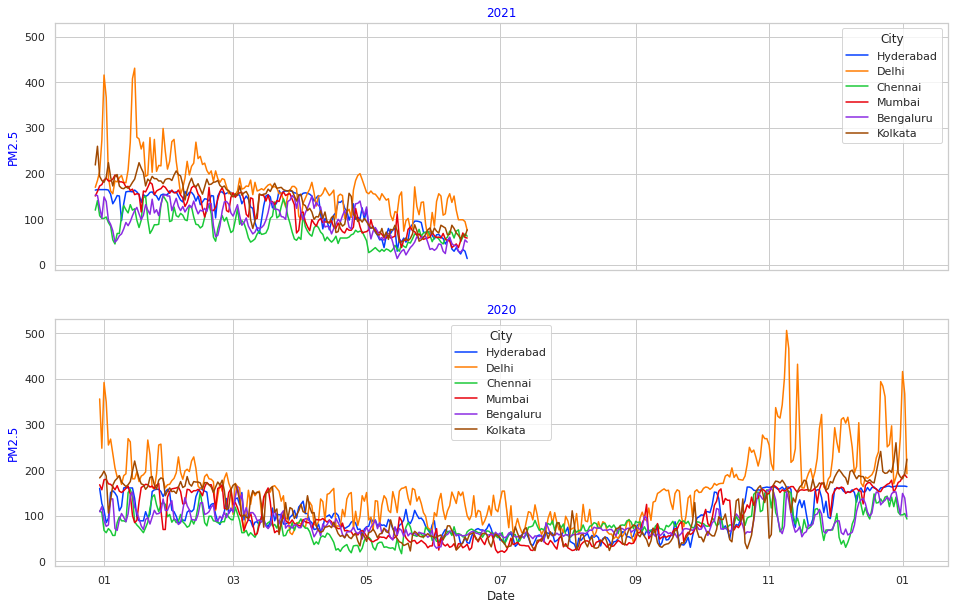

In [113]:
fig,ax = plt.subplots(2,1,figsize = (16,10),sharex=True,sharey=True)
df20viz = df20p25
df20viz['Date'] = df20viz['Date'] + pd.DateOffset(years=1)
sns.lineplot(df21p25.Date,df21p25['median'],hue=df21p25.City,ax=ax[0])
ax[0].set_title('2021',fontsize=12, c='blue')
ax[0].set_ylabel('PM2.5', fontsize=12,c='blue')
sns.lineplot(df20viz.Date,df20viz['median'],hue=df20viz.City,ax=ax[1])
ax[1].set_title('2020',fontsize=12, c='blue')
ax[1].set_ylabel('PM2.5', fontsize=12,c='blue')
date_form = DateFormatter("%m")
ax[0].xaxis.set_major_formatter(date_form)
fig.savefig(f'images/2021_1.png',bbox_inches='tight')

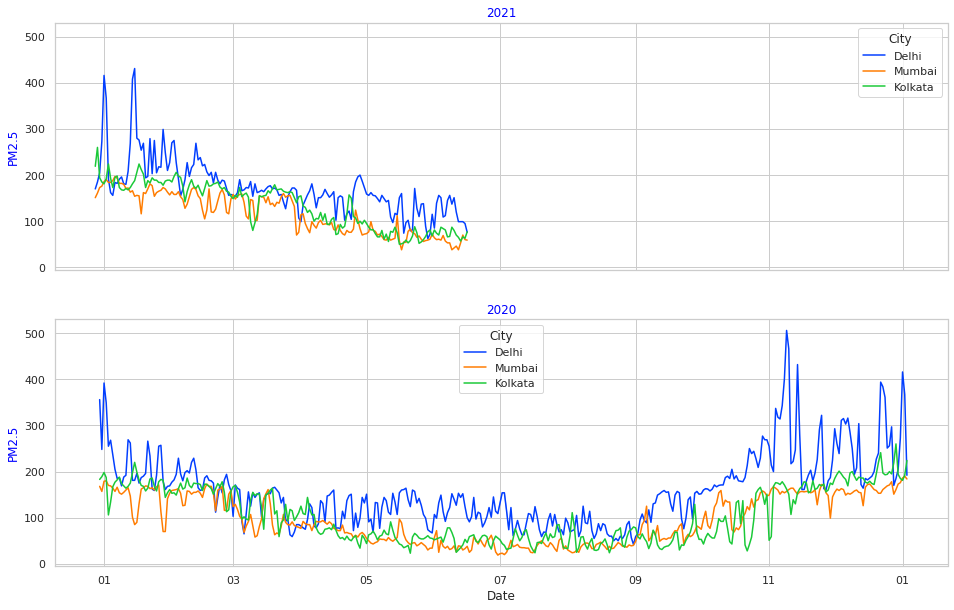

In [114]:
df21p25s = df21p25[df21p25.City.isin(['Delhi','Kolkata','Mumbai'])]
df20p25s = df20p25[df20p25.City.isin(['Delhi','Kolkata','Mumbai'])]

fig,ax = plt.subplots(2,1,figsize = (16,10),sharex=True,sharey=True)
df20viz = df20p25s
#df20viz['Date'] = df20viz['Date'] + pd.DateOffset(years=1)
sns.lineplot(df21p25s.Date,df21p25s['median'],hue=df21p25s.City,ax=ax[0])
sns.lineplot(df20viz.Date,df20viz['median'],hue=df20viz.City,ax=ax[1])
ax[0].set_title('2021',fontsize=12, c='blue')
ax[1].set_title('2020',fontsize=12, c='blue')
ax[0].set_ylabel('PM2.5', fontsize=12,c='blue')
ax[1].set_ylabel('PM2.5', fontsize=12,c='blue')
date_form = DateFormatter("%m")
ax[0].xaxis.set_major_formatter(date_form)
fig.savefig(f'images/2021_2.png',bbox_inches='tight')

In [115]:
df21p25s = df21p25[df21p25.City.isin(['Delhi','Kolkata','Mumbai'])]


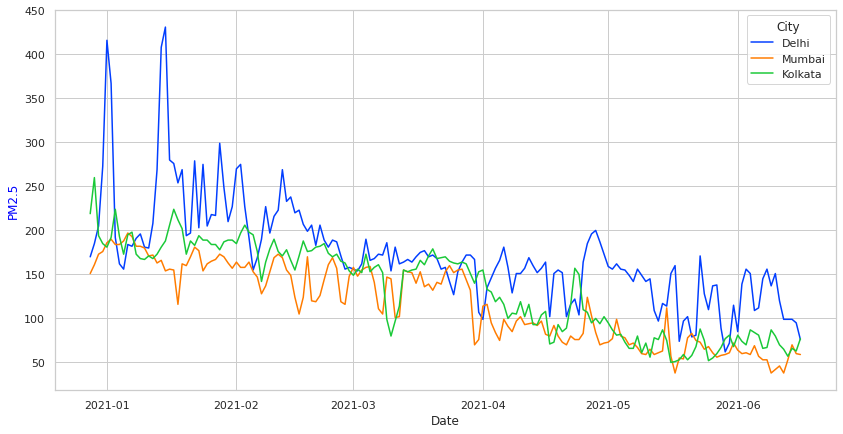

In [116]:
fig,ax = plt.subplots(1,1,figsize = (14,7),sharex=True,sharey=True)
sns.lineplot(df21p25s.Date,df21p25s['median'],hue = df21p25s.City)
ax.set_ylabel('PM2.5', fontsize=12,c='blue')
fig.savefig(f'images/2021_3.png',bbox_inches='tight')

In [117]:
df21p25s = df21p25[df21p25.City.isin(['Mumbai'])]

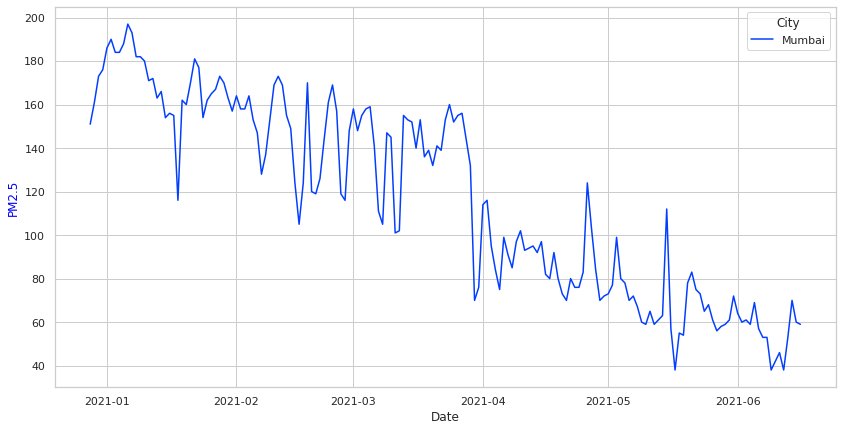

In [118]:
fig,ax = plt.subplots(1,1,figsize = (14,7),sharex=True,sharey=True)
sns.lineplot(df21p25s.Date,df21p25s['median'],hue = df21p25s.City)
ax.set_ylabel('PM2.5', fontsize=12,c='blue')
fig.savefig(f'images/2021_4.png',bbox_inches='tight')

In [119]:
city = df21.City.unique()
specie = df21.Specie.unique()
specie

array(['no2', 'pressure', 'pm10', 'o3', 'temperature', 'humidity', 'so2',
       'pm25', 'wind-speed', 'wind-gust', 'dew', 'co', 'wd',
       'precipitation'], dtype=object)

In [120]:
species = ['no2', 'pm10', 'o3', 'so2', 'pm25', 'co']

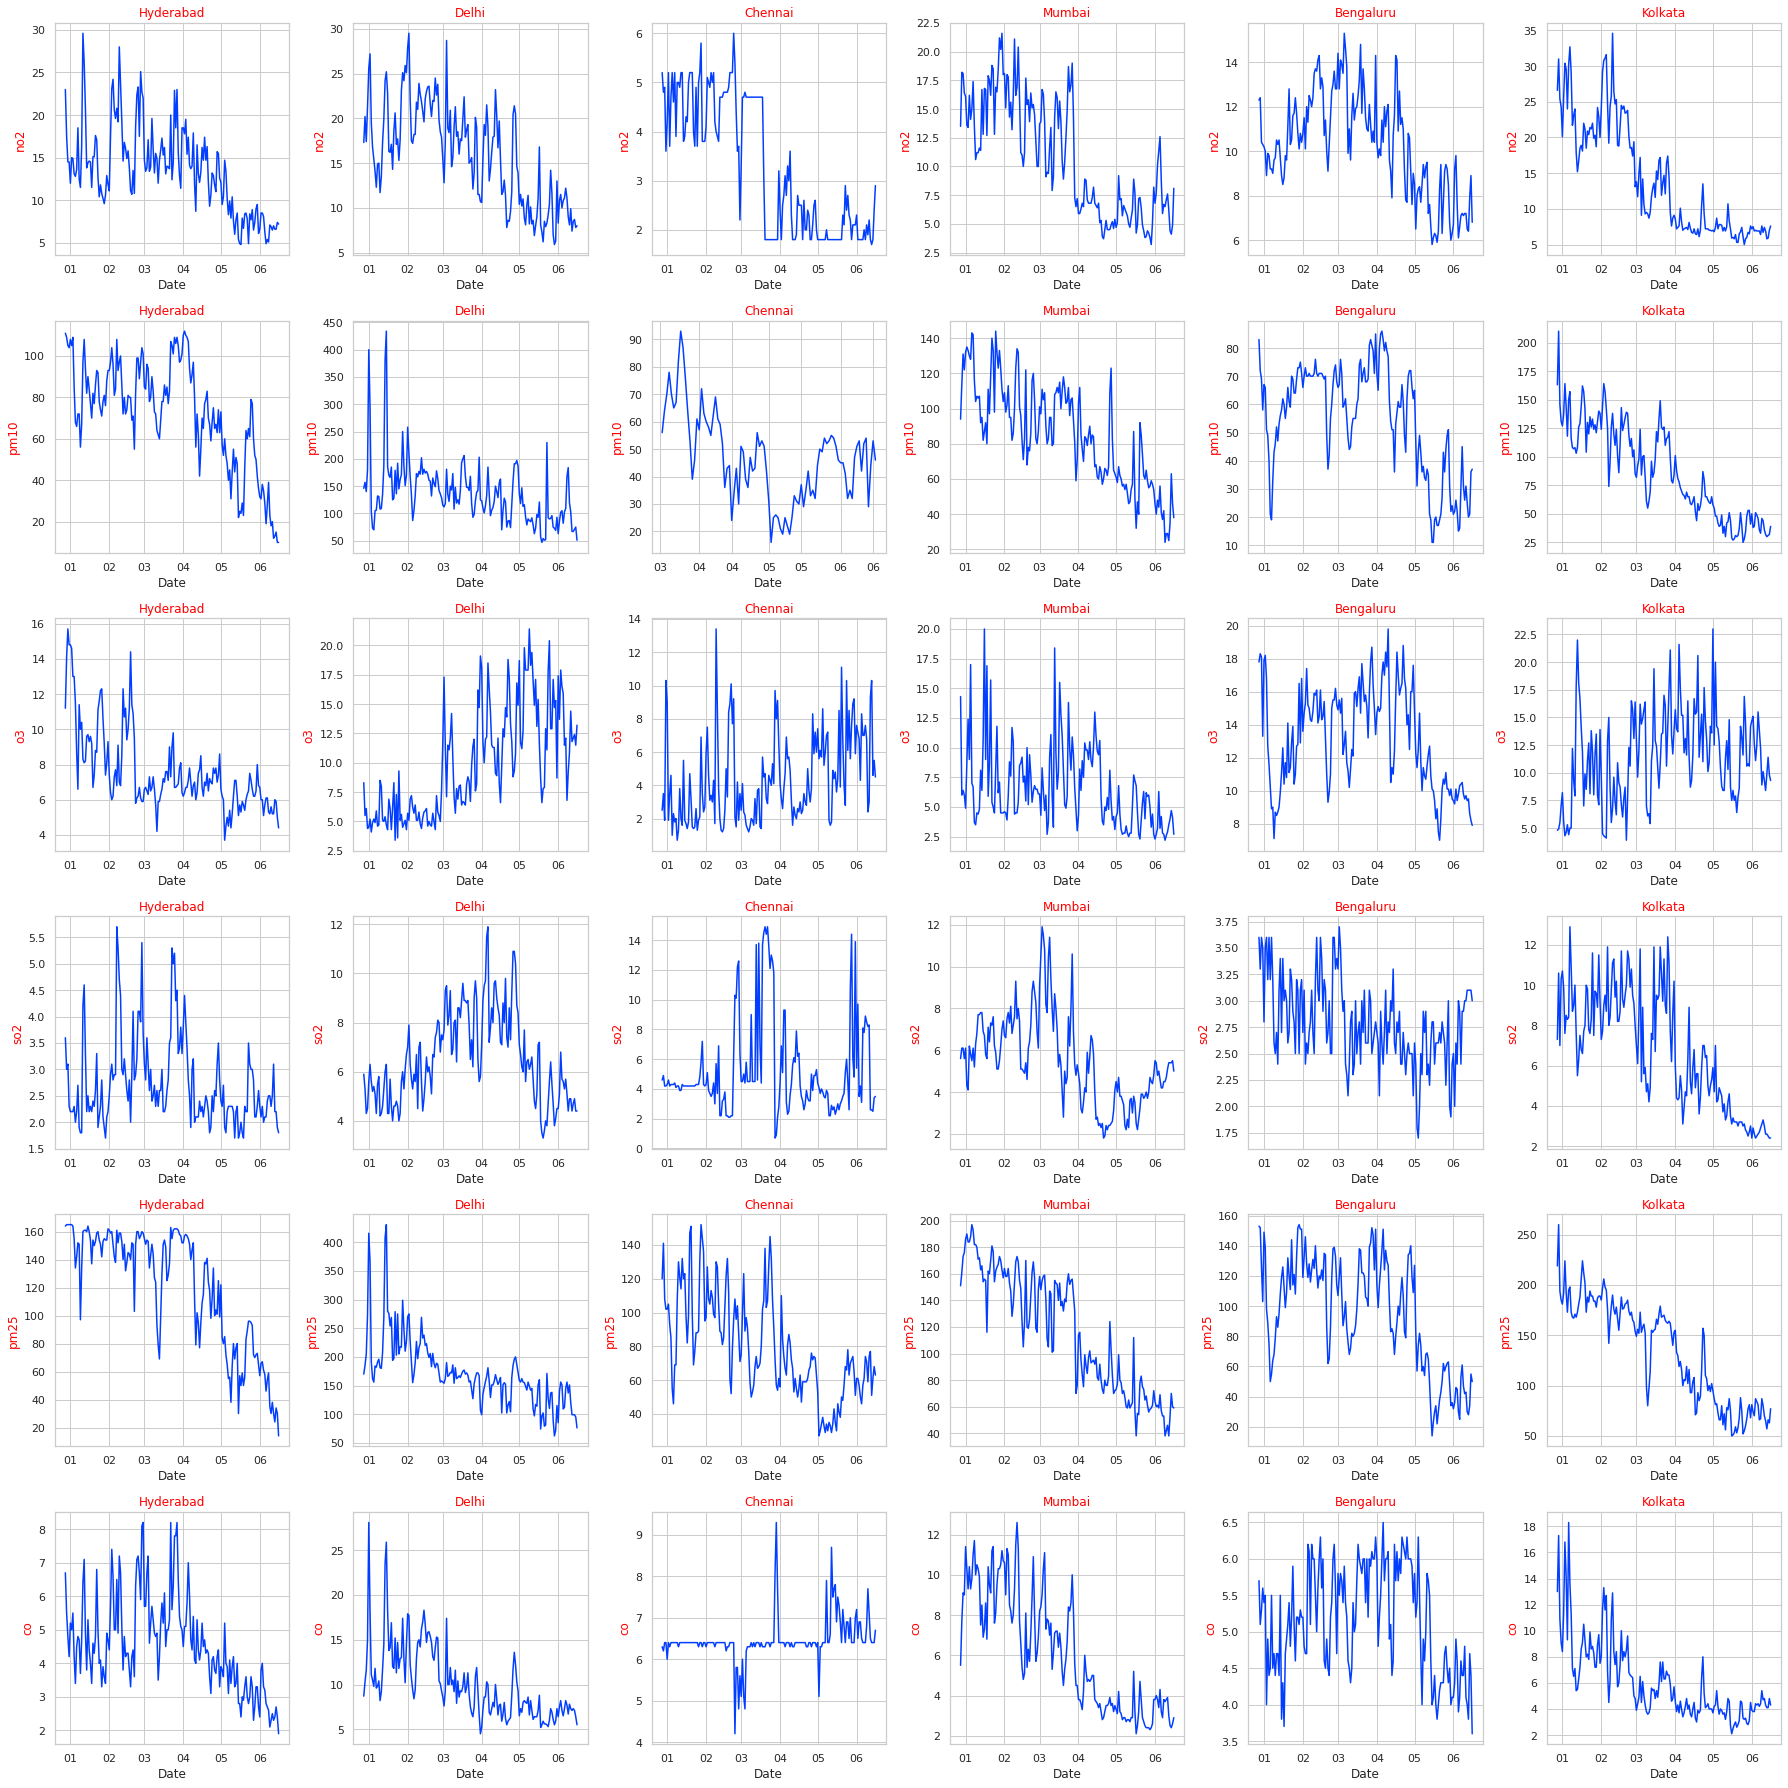

In [121]:
fig,ax = plt.subplots(6,6,figsize=(25,25))
for l,i in enumerate(species):
    for g,j in enumerate(city):
        df21s = df21[df21.Specie.isin([i])]
        #print(l,g)
        df21sc = df21s[df21s.City.isin([j])]
        sns.lineplot(df21sc['Date'],df21sc['median'],ax=ax[l][g])
        ax[l][g].set_ylabel(i, fontsize=12,c='red')
        ax[l][g].set_title(j,fontsize=12, c='red')
        date_form = DateFormatter("%m")
        ax[l][g].xaxis.set_major_formatter(date_form)
plt.tight_layout()
plt.show()
fig.savefig(f'images/2021_5.png',bbox_inches='tight')